In [1]:
import sys, os, collections
import pandas as pd
import numpy as np
import re
from tf.fabric import Fabric
from tf.app import use

In [2]:
# Now we load the TF bhsa database
# BHS = use('bhsa', checkout='latest', hoist=globals())
BHS = use('bhsa', hoist=globals())

This is Text-Fabric 9.1.7
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

129 features found and 0 ignored


# Lets get the relevant data
## Loading all TF bhsa words

In [3]:
# Searching for "Abram" and "Abraham" in the OT
g_lex_utf8 = '''
word lex_utf8* g_lex_utf8* lex* gloss* language*
'''
g_lex_utf8  = BHS.search(g_lex_utf8)
BHS.show(g_lex_utf8, start=1, end=2, condensed=True, extraFeatures={'gloss'})

  3.41s 426590 results


In [4]:
BHS.export(g_lex_utf8, toDir='d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/', toFile='g_lex_utf8.tsv')

In [5]:
g_lex_utf8_2021=pd.read_csv('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/g_lex_utf8.tsv', delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
g_lex_utf8_2021.head(10)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,g_lex_utf81,gloss1,language1,lex1,lex_utf81
0,1,Genesis,1,1,1,word,בְּ,בְּ,in,Hebrew,B,ב
1,2,Genesis,1,1,2,word,רֵאשִׁ֖ית,רֵאשִׁית,beginning,Hebrew,R>CJT/,ראשׁית
2,3,Genesis,1,1,3,word,בָּרָ֣א,בָּרָא,create,Hebrew,BR>[,ברא
3,4,Genesis,1,1,4,word,אֱלֹהִ֑ים,אֱלֹה,god(s),Hebrew,>LHJM/,אלהים
4,5,Genesis,1,1,5,word,אֵ֥ת,אֵת,<object marker>,Hebrew,>T,את
5,6,Genesis,1,1,6,word,הַ,הַ,the,Hebrew,H,ה
6,7,Genesis,1,1,7,word,שָּׁמַ֖יִם,שָּׁמַי,heavens,Hebrew,CMJM/,שׁמים
7,8,Genesis,1,1,8,word,וְ,וְ,and,Hebrew,W,ו
8,9,Genesis,1,1,9,word,אֵ֥ת,אֵת,<object marker>,Hebrew,>T,את
9,10,Genesis,1,1,10,word,הָ,הָ,the,Hebrew,H,ה


In [6]:
g_lex_utf8_2021 = g_lex_utf8_2021[["R","lex1", "lex_utf81", "g_lex_utf81", "gloss1", "language1" ]]
g_lex_utf8_2021.head(5)

,R,lex1,lex_utf81,g_lex_utf81,gloss1,language1
0,1,B,ב,בְּ,in,Hebrew
1,2,R>CJT/,ראשׁית,רֵאשִׁית,beginning,Hebrew
2,3,BR>[,ברא,בָּרָא,create,Hebrew
3,4,>LHJM/,אלהים,אֱלֹה,god(s),Hebrew
4,5,>T,את,אֵת,<object marker>,Hebrew


In [7]:
existing_TF_bhsa2021_data = g_lex_utf8_2021.rename(columns = {"R":"TF_bhsa_orig_order","lex1":"lex", "lex_utf81":"lex_utf8", "g_lex_utf81":"g_lex_utf8", "gloss1":"gloss", "language1":"language" })
existing_TF_bhsa2021_data.head(5)

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language
0,1,B,ב,בְּ,in,Hebrew
1,2,R>CJT/,ראשׁית,רֵאשִׁית,beginning,Hebrew
2,3,BR>[,ברא,בָּרָא,create,Hebrew
3,4,>LHJM/,אלהים,אֱלֹה,god(s),Hebrew
4,5,>T,את,אֵת,<object marker>,Hebrew


In [8]:
existing_TF_bhsa2021_data.describe()

,TF_bhsa_orig_order
count,426590.000000
mean,213295.500000
std,123146.070003
min,1.000000
25%,106648.250000
50%,213295.500000
75%,319942.750000
max,426590.000000


## Loading the BOL Hebrew dictionary

In [9]:
BOL_dict_HEB=pd.read_excel('d:/OneDrive/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.01_progression.xlsx', 'Hebrew_BibleOL-updated_20180822')
pd.set_option('display.max_columns', 50)
BOL_dict_HEB.head(5)

,section,Frequency rank,Occurrences,absolut alphabetic order,Lexeme in lexicon,Vocalized lexeme,verbal class 1st cons,verbal class 2nd cons,verbal class 3rd cons,verbal class other,verbal class list with formula,verbal class list witout formula,Part of speech,Verbal stems,Current EN glosses,Vocalized lexeme as in Mitchel (print edition),Vocalized lexeme as in Mitchel (Logos version),Mitchel Section,Rational for change,Mitchel non-verb gloss EN,New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN,New glosses (verbs:prioritized displayed meaning of verbs) with excel formula EN,meaning fixed,Qal=1 EN,Nifal=2 EN,Piel=3 EN,Pual=4 EN,Hitpael=5 EN,Hifil=6 EN,Hofal=7 EN,Hishtafal=8 EN,Passive qal=9 EN,Etpaal=10 EN,Nitpael=11 EN,Hotpaal=12 EN,Tifal=13 EN,Hitpoal=14 EN,Poal=15 EN,Poel=16 EN
0,sec0113,1,50273,1953,W,וְ,NaN,NaN,NaN,NaN,", , ,",NaN,conj,NaN,and,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,"and; also, even (conj); but","and; also, even (conj); but",NaN,done,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,sec0111,2,30380,1793,H,הַ I,NaN,NaN,NaN,NaN,", , ,",NaN,art,NaN,the,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,the (art),the (art),NaN,done,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,sec0120,3,20069,3682,L,לְ,NaN,NaN,NaN,NaN,", , ,",NaN,prep,NaN,"to, in regard to, for",NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,"to, toward (prep); Do, Yes, (voc); in regard t...","to, toward (prep); Do, Yes, (voc); in regard t...",NaN,done,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,sec0108,4,15541,834,B,בְּ,NaN,NaN,NaN,NaN,", , ,",NaN,prep,NaN,"in, at (time, place); with; by; by means of",NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,"in, at (time, place); with; by; by means of","in, at (time, place); with; by; by means of",NaN,done,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,sec0107,5,11016,814,>T,אֵת I,NaN,NaN,NaN,NaN,", , ,",NaN,prep,NaN,<object marker>,NaN,NaN,Mitchel_Sec1.A (50273-2200),NaN,<OM>; object marker,<OM>; object marker,NaN,done,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
BOL_dict_HEB= BOL_dict_HEB[['absolut alphabetic order','Lexeme in lexicon', 'Vocalized lexeme', 'New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN','verbal class list witout formula']]
BOL_dict_HEB.head(5)

,absolut alphabetic order,Lexeme in lexicon,Vocalized lexeme,New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN,verbal class list witout formula
0,1953,W,וְ,"and; also, even (conj); but",NaN
1,1793,H,הַ I,the (art),NaN
2,3682,L,לְ,"to, toward (prep); Do, Yes, (voc); in regard t...",NaN
3,834,B,בְּ,"in, at (time, place); with; by; by means of",NaN
4,814,>T,אֵת I,<OM>; object marker,NaN


In [11]:
BOL_dict_HEB=BOL_dict_HEB.rename(columns = {'absolut alphabetic order':'abc_order_HEB','Lexeme in lexicon':'lex', 'Vocalized lexeme':'dict_lex_HEB', 'New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN':'dict_bol_HEB','verbal class list witout formula':'verbalclass_HEB'})
BOL_dict_HEB.head(5)

,abc_order_HEB,lex,dict_lex_HEB,dict_bol_HEB,verbalclass_HEB
0,1953,W,וְ,"and; also, even (conj); but",NaN
1,1793,H,הַ I,the (art),NaN
2,3682,L,לְ,"to, toward (prep); Do, Yes, (voc); in regard t...",NaN
3,834,B,בְּ,"in, at (time, place); with; by; by means of",NaN
4,814,>T,אֵת I,<OM>; object marker,NaN


## Loading the BOL Aramaic Dictionary

In [12]:
BOL_dict_ARM=pd.read_excel('d:/OneDrive/1200_AUS-research/GLI/BibleOL_dictionary_vebal-classes_project/ETCBC4-frequency4.01_progression.xlsx', 'Aramaic_BibleOL-updated_202112')
pd.set_option('display.max_columns', 50)
BOL_dict_ARM.head(5)

,Frequency rank,Occurrences,absolut alphabetic order,Lexeme in lexicon,Vocalized lexeme,verbal class 1st cons,verbal class 2nd cons,verbal class 3rd cons,verbal class other,verbal class list with formula,verbal class list witout formula,Part of speech,Verbal stems,Current EN glosses,"New glosses, non-verbs",New glosses combined,New glosses_with_prioritized displayed meaning of verbs_without_excel_formula_EN,New glosses (verbs:prioritized displayed meaning of verbs) with excel formula EN,meaning fixed,Peal=1,Pael=2,Peil=3,Hafel=4,Hofal=5,Afel=6,Shafel=7,Hitpeel=8,Hitpaal=9,Hishtafal=10,Etpaal=11,Etpeel=12
0,283,3,1,>B=/,אֵב,NaN,NaN,NaN,NaN,", , ,",NaN,subs,NaN,fruit,NaN,fruit,NaN,NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112,9,2,>B/,אַב,NaN,NaN,NaN,NaN,", , ,",NaN,subs,NaN,father,NaN,father,NaN,NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,143,7,3,>BD[,אבד,i-guttural,NaN,NaN,NaN,"i-guttural, , ,",i-guttural,verb,haf hof peal,perish,NaN,"peal: perish; haf: slay, destroy; hof: be dest...",NaN,"peal: perish; pael: ; peil: ; haf: slay, destr...",Peal=1,perish,NaN,NaN,"slay, destroy",be destroyed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125,8,4,>BN/,אֶבֶן,NaN,NaN,NaN,NaN,", , ,",NaN,subs,NaN,stone,NaN,stone,NaN,NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,283,3,5,>GRH/,אִגְּרָה,NaN,NaN,NaN,NaN,", , ,",NaN,subs,NaN,letter,NaN,letter,NaN,NaN,done,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
BOL_dict_ARM= BOL_dict_ARM[['absolut alphabetic order','Lexeme in lexicon', 'Vocalized lexeme', 'New glosses combined','verbal class list witout formula']]
BOL_dict_ARM

,absolut alphabetic order,Lexeme in lexicon,Vocalized lexeme,New glosses combined,verbal class list witout formula
0,1,>B=/,אֵב,fruit,NaN
1,2,>B/,אַב,father,NaN
2,3,>BD[,אבד,"peal: perish; haf: slay, destroy; hof: be dest...",i-guttural
3,4,>BN/,אֶבֶן,stone,NaN
4,5,>GRH/,אִגְּרָה,letter,NaN
...,...,...,...,...,...
702,703,TQP[,תקף,"peal: be, become strong; pael: enforce",NaN
703,704,TRJN/,תְּרֵין,two,NaN
704,705,TR</,תְּרַע,door; court,NaN
705,706,TR<=/,תָּרָע,door-keeper,NaN


In [14]:
BOL_dict_ARM=BOL_dict_ARM.rename(columns = {'absolut alphabetic order':'abc_order_ARM','Lexeme in lexicon':'lex', 'Vocalized lexeme':'dict_lex_ARM', 'New glosses combined':'dict_bol_ARM', 'verbal class list witout formula':'verbclass_ARM'})
BOL_dict_ARM.head(5)

,abc_order_ARM,lex,dict_lex_ARM,dict_bol_ARM,verbclass_ARM
0,1,>B=/,אֵב,fruit,NaN
1,2,>B/,אַב,father,NaN
2,3,>BD[,אבד,"peal: perish; haf: slay, destroy; hof: be dest...",i-guttural
3,4,>BN/,אֶבֶן,stone,NaN
4,5,>GRH/,אִגְּרָה,letter,NaN


# Selecting the TF Hebrew and Aramaic parts to form seperate DFs
## Working on Aramaic and adding alphabetic ordering information

In [15]:
TF_aramaic = existing_TF_bhsa2021_data['language']=="Aramaic"

In [16]:
TF_aramaic.head(5)

0    False
1    False
2    False
3    False
4    False
Name: language, dtype: bool

In [17]:
TF_ARM_lex=existing_TF_bhsa2021_data[TF_aramaic]
TF_ARM_lex.head(5)

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language
17277,17278,JGR/,יגר,יְגַר,heap of stones,Aramaic
17278,17279,FHDW/,שׂהדו,שָׂהֲדוּ,testimony,Aramaic
240075,240076,K,כ,כִּ,like,Aramaic
240076,240077,DNH,דנה,דְנָה,this,Aramaic
240077,240078,>MR[,אמר,אמְר,say,Aramaic


In [18]:
TF_ARM_lex.describe()

,TF_bhsa_orig_order
count,6106.000000
mean,374242.670488
std,10528.593512
min,17278.000000
25%,372113.250000
50%,373639.500000
75%,375165.750000
max,381482.000000


### Lets get Aramaic Ready

In [19]:
# lets remove duplicates to create an alphabetic order for the Armaic words
TF_ARM_lex_abc = TF_ARM_lex.drop_duplicates(subset='lex', keep="first")
TF_ARM_lex_abc.head(2)

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language
17277,17278,JGR/,יגר,יְגַר,heap of stones,Aramaic
17278,17279,FHDW/,שׂהדו,שָׂהֲדוּ,testimony,Aramaic


In [20]:
TF_ARM_lex_abc = TF_ARM_lex_abc.sort_values(by=['lex_utf8'], ascending=True)
TF_ARM_lex_abc.head(2)

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language
372527,372528,>B=/,אב,אִנְבּ,fruit,Aramaic
370978,370979,>B/,אב,אֲבָה,father,Aramaic


In [21]:
TF_ARM_lex_abc['TF_abc_order_ARM'] = np.arange(len(TF_ARM_lex_abc))+1
TF_ARM_lex_abc.head()

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language,TF_abc_order_ARM
372527,372528,>B=/,אב,אִנְבּ,fruit,Aramaic,1
370978,370979,>B/,אב,אֲבָה,father,Aramaic,2
240086,240087,>BD[,אבד,אבַד,perish,Aramaic,3
371222,371223,>BN/,אבן,אֶבֶן,stone,Aramaic,4
379674,379675,>GRH/,אגרה,אִגְּר,letter,Aramaic,5


In [22]:
TF_ARM_lex_abc.describe()

,TF_bhsa_orig_order,TF_abc_order_ARM
count,708.000000,708.000000
mean,369831.241525,354.500000
std,27664.418638,204.526282
min,17278.000000,1.000000
25%,371239.750000,177.750000
50%,372590.500000,354.500000
75%,374716.250000,531.250000
max,381478.000000,708.000000


In [23]:
# now we add the ABC order to the lexaramaic

TF_ARM_lex=pd.merge (TF_ARM_lex_abc, TF_ARM_lex,
                      on='lex',
                      how='outer')
TF_ARM_lex.head(5)

,TF_bhsa_orig_order_x,lex,lex_utf8_x,g_lex_utf8_x,gloss_x,language_x,TF_abc_order_ARM,TF_bhsa_orig_order_y,lex_utf8_y,g_lex_utf8_y,gloss_y,language_y
0,372528,>B=/,אב,אִנְבּ,fruit,Aramaic,1,372528,אב,אִנְבּ,fruit,Aramaic
1,372528,>B=/,אב,אִנְבּ,fruit,Aramaic,1,372580,אב,אִנְבּ,fruit,Aramaic
2,372528,>B=/,אב,אִנְבּ,fruit,Aramaic,1,372748,אב,אִנְבּ,fruit,Aramaic
3,370979,>B/,אב,אֲבָה,father,Aramaic,2,370979,אב,אֲבָה,father,Aramaic
4,370979,>B/,אב,אֲבָה,father,Aramaic,2,373196,אב,אֲב,father,Aramaic


In [24]:
# lets cleanup
TF_ARM_lex= TF_ARM_lex[['TF_bhsa_orig_order_y','TF_abc_order_ARM', 'lex',  'lex_utf8_y', 'g_lex_utf8_y','gloss_y', 'language_y']]
TF_ARM_lex.head()



,TF_bhsa_orig_order_y,TF_abc_order_ARM,lex,lex_utf8_y,g_lex_utf8_y,gloss_y,language_y
0,372528,1,>B=/,אב,אִנְבּ,fruit,Aramaic
1,372580,1,>B=/,אב,אִנְבּ,fruit,Aramaic
2,372748,1,>B=/,אב,אִנְבּ,fruit,Aramaic
3,370979,2,>B/,אב,אֲבָה,father,Aramaic
4,373196,2,>B/,אב,אֲב,father,Aramaic


In [25]:
TF_ARM_lex = TF_ARM_lex.rename(columns = {"TF_bhsa_orig_order_y":"TF_bhsa_orig_order", "abc_order_ARM_x":"abc_order_ARM", "lex_utf8_y":"lex_utf8", "g_lex_utf8_y":"g_lex_utf8","gloss_y":"gloss", "language_y":"language"})
TF_ARM_lex.head()


,TF_bhsa_orig_order,TF_abc_order_ARM,lex,lex_utf8,g_lex_utf8,gloss,language
0,372528,1,>B=/,אב,אִנְבּ,fruit,Aramaic
1,372580,1,>B=/,אב,אִנְבּ,fruit,Aramaic
2,372748,1,>B=/,אב,אִנְבּ,fruit,Aramaic
3,370979,2,>B/,אב,אֲבָה,father,Aramaic
4,373196,2,>B/,אב,אֲב,father,Aramaic


In [26]:
TF_ARM_lex = TF_ARM_lex.sort_values(by=['TF_bhsa_orig_order'], ascending=True)
TF_ARM_lex.head()

,TF_bhsa_orig_order,TF_abc_order_ARM,lex,lex_utf8,g_lex_utf8,gloss,language
2950,17278,280,JGR/,יגר,יְגַר,heap of stones,Aramaic
5989,17279,674,FHDW/,שׂהדו,שָׂהֲדוּ,testimony,Aramaic
3185,240076,311,K,כ,כִּ,like,Aramaic
1559,240077,170,DNH,דנה,דְנָה,this,Aramaic
308,240078,39,>MR[,אמר,אמְר,say,Aramaic


In [27]:
TF_ARM_lex.describe()

,TF_bhsa_orig_order,TF_abc_order_ARM
count,6106.000000,6106.000000
mean,374242.670488,301.296594
std,10528.593512,181.417018
min,17278.000000,1.000000
25%,372113.250000,158.250000
50%,373639.500000,286.000000
75%,375165.750000,423.000000
max,381482.000000,708.000000


In [28]:
## Deleting duplicate columns
# TF_ARM_lex = TF_ARM_lex.loc[:,~TF_ARM_lex.columns.duplicated()]
# TF_ARM_lex.head()

# another method:
# lexaramaic.reset_index().T.drop_duplicates().T

### Lets get Hebrew Ready

In [29]:
TF_Hebrew  = existing_TF_bhsa2021_data['language']=="Hebrew"

In [30]:
TF_Hebrew.head(5)

0    True
1    True
2    True
3    True
4    True
Name: language, dtype: bool

In [31]:
# lets do the same with Hebrw
TF_HEB_lex=existing_TF_bhsa2021_data[TF_Hebrew]
TF_HEB_lex.head(5)

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language
0,1,B,ב,בְּ,in,Hebrew
1,2,R>CJT/,ראשׁית,רֵאשִׁית,beginning,Hebrew
2,3,BR>[,ברא,בָּרָא,create,Hebrew
3,4,>LHJM/,אלהים,אֱלֹה,god(s),Hebrew
4,5,>T,את,אֵת,<object marker>,Hebrew


In [32]:
TF_HEB_lex.describe()

,TF_bhsa_orig_order
count,420484.000000
mean,210958.328020
std,122482.394298
min,1.000000
25%,105123.750000
50%,210244.500000
75%,315384.250000
max,426590.000000


In [33]:
# lets remove duplicates to create an alphabetic order for the Hebrew words
TF_HEB_lex_abc = TF_HEB_lex.drop_duplicates(subset='lex', keep="first")
TF_HEB_lex_abc.head(2)

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language
0,1,B,ב,בְּ,in,Hebrew
1,2,R>CJT/,ראשׁית,רֵאשִׁית,beginning,Hebrew


In [34]:
TF_HEB_lex_abc = TF_HEB_lex_abc.sort_values(by=['lex_utf8'], ascending=True)
TF_HEB_lex_abc.head(2)

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language
1143,1144,>B/,אב,אָב,father,Hebrew
338180,338181,>B=/,אב,אִבּ,bud,Hebrew


In [35]:
TF_HEB_lex_abc['TF_abc_order_HEB'] = np.arange(len(TF_HEB_lex_abc))+1
TF_HEB_lex_abc.head()

,TF_bhsa_orig_order,lex,lex_utf8,g_lex_utf8,gloss,language,TF_abc_order_HEB
1143,1144,>B/,אב,אָב,father,Hebrew,1
338180,338181,>B=/,אב,אִבּ,bud,Hebrew,2
365677,365678,>BGT>/,אבגתא,אֲבַגְתָא,Abagtha,Hebrew,3
33972,33973,>BD[,אבד,אָבְד,perish,Hebrew,4
40757,40758,>BDH/,אבדה,אֲבֵד,what is lost,Hebrew,5


In [36]:
TF_HEB_lex_abc.describe()

,TF_bhsa_orig_order,TF_abc_order_HEB
count,8522.000000,8522.00000
mean,170453.490613,4261.50000
std,133136.100154,2460.23383
min,1.000000,1.00000
25%,39397.250000,2131.25000
50%,150878.500000,4261.50000
75%,286338.000000,6391.75000
max,426421.000000,8522.00000


In [37]:
# now we add the ABC order to the lexaramaic

TF_HEB_lex=pd.merge (TF_HEB_lex_abc, TF_HEB_lex,
                      on='lex',
                      how='outer')
TF_HEB_lex.head(5)

,TF_bhsa_orig_order_x,lex,lex_utf8_x,g_lex_utf8_x,gloss_x,language_x,TF_abc_order_HEB,TF_bhsa_orig_order_y,lex_utf8_y,g_lex_utf8_y,gloss_y,language_y
0,1144,>B/,אב,אָב,father,Hebrew,1,1144,אב,אָב,father,Hebrew
1,1144,>B/,אב,אָב,father,Hebrew,1,2010,אב,אֲב,father,Hebrew
2,1144,>B/,אב,אָב,father,Hebrew,1,2021,אב,אֲב,father,Hebrew
3,1144,>B/,אב,אָב,father,Hebrew,1,4387,אב,אֲב,father,Hebrew
4,1144,>B/,אב,אָב,father,Hebrew,1,4424,אב,אֲב,father,Hebrew


In [38]:
# lets cleanup
TF_HEB_lex= TF_HEB_lex[['TF_bhsa_orig_order_y','TF_abc_order_HEB', 'lex',  'lex_utf8_y', 'g_lex_utf8_y','gloss_y', 'language_y']]
TF_HEB_lex.head()



,TF_bhsa_orig_order_y,TF_abc_order_HEB,lex,lex_utf8_y,g_lex_utf8_y,gloss_y,language_y
0,1144,1,>B/,אב,אָב,father,Hebrew
1,2010,1,>B/,אב,אֲב,father,Hebrew
2,2021,1,>B/,אב,אֲב,father,Hebrew
3,4387,1,>B/,אב,אֲב,father,Hebrew
4,4424,1,>B/,אב,אֲב,father,Hebrew


In [39]:
TF_HEB_lex = TF_HEB_lex.rename(columns = {"TF_bhsa_orig_order_y":"TF_bhsa_orig_order", "lex_utf8_y":"lex_utf8", "g_lex_utf8_y":"g_lex_utf8","gloss_y":"gloss", "language_y":"language"})
TF_HEB_lex.head()


,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,gloss,language
0,1144,1,>B/,אב,אָב,father,Hebrew
1,2010,1,>B/,אב,אֲב,father,Hebrew
2,2021,1,>B/,אב,אֲב,father,Hebrew
3,4387,1,>B/,אב,אֲב,father,Hebrew
4,4424,1,>B/,אב,אֲב,father,Hebrew


In [40]:
TF_HEB_lex = TF_HEB_lex.sort_values(by=['TF_bhsa_orig_order'], ascending=True)
TF_HEB_lex.head()

,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,gloss,language
61968,1,832,B,ב,בְּ,in,Hebrew
387788,2,7115,R>CJT/,ראשׁית,רֵאשִׁית,beginning,Hebrew
93267,3,1186,BR>[,ברא,בָּרָא,create,Hebrew
22980,4,412,>LHJM/,אלהים,אֱלֹה,god(s),Hebrew
48909,5,812,>T,את,אֵת,<object marker>,Hebrew


In [41]:
## For removing dublicate columns 
# lexhebrew = lexhebrew.loc[:,~lexhebrew.columns.duplicated()]
# lexhebrew.head()

# another method:
# lexaramaic.reset_index().T.drop_duplicates().T

In [42]:
TF_HEB_lex.describe()

,TF_bhsa_orig_order,TF_abc_order_HEB
count,420484.000000,420484.000000
mean,210958.328020,3144.998121
std,122482.394298,2212.387469
min,1.000000,1.000000
25%,105123.750000,1649.000000
50%,210244.500000,2397.000000
75%,315384.250000,4344.000000
max,426590.000000,8522.000000


# Now we Merge bol_dicationary DFs with TF_lex DFs
Checkout this helpful article:
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Now we merge TF_ARM_Lex with bol_ARM_dict

In [43]:
#Now we do a VLookUp similar function with "merge". see more here: https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/
TF_BOL_Aramaic=pd.merge (BOL_dict_ARM, TF_ARM_lex,
                      on='lex',
                      how='outer')
TF_BOL_Aramaic.head(5)

,abc_order_ARM,lex,dict_lex_ARM,dict_bol_ARM,verbclass_ARM,TF_bhsa_orig_order,TF_abc_order_ARM,lex_utf8,g_lex_utf8,gloss,language
0,1.0,>B=/,אֵב,fruit,NaN,372528,1,אב,אִנְבּ,fruit,Aramaic
1,1.0,>B=/,אֵב,fruit,NaN,372580,1,אב,אִנְבּ,fruit,Aramaic
2,1.0,>B=/,אֵב,fruit,NaN,372748,1,אב,אִנְבּ,fruit,Aramaic
3,2.0,>B/,אַב,father,NaN,370979,2,אב,אֲבָה,father,Aramaic
4,2.0,>B/,אַב,father,NaN,373196,2,אב,אֲב,father,Aramaic


In [44]:
TF_BOL_Aramaic = TF_BOL_Aramaic[['TF_bhsa_orig_order','TF_abc_order_ARM','lex', 'lex_utf8', 'g_lex_utf8', 'dict_lex_ARM','dict_bol_ARM', 'gloss', 'verbclass_ARM','language']]
TF_BOL_Aramaic.head()

,TF_bhsa_orig_order,TF_abc_order_ARM,lex,lex_utf8,g_lex_utf8,dict_lex_ARM,dict_bol_ARM,gloss,verbclass_ARM,language
0,372528,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
1,372580,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
2,372748,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
3,370979,2,>B/,אב,אֲבָה,אַב,father,father,NaN,Aramaic
4,373196,2,>B/,אב,אֲב,אַב,father,father,NaN,Aramaic


In [45]:
TF_BOL_Aramaic.describe()
# the BOL dictionary misses 2 Aramaic words!

,TF_bhsa_orig_order,TF_abc_order_ARM
count,6106.000000,6106.000000
mean,374242.670488,301.296594
std,10528.593512,181.417018
min,17278.000000,1.000000
25%,372113.250000,158.250000
50%,373639.500000,286.000000
75%,375165.750000,423.000000
max,381482.000000,708.000000


In [46]:
# Lets test whether the BOL dictionary got stored in the TF data
# Lets first look for a Hebrew word

TF_BOL_Aramaic[(TF_BOL_Aramaic['TF_bhsa_orig_order'] == 17277.0)].head()

,TF_bhsa_orig_order,TF_abc_order_ARM,lex,lex_utf8,g_lex_utf8,dict_lex_ARM,dict_bol_ARM,gloss,verbclass_ARM,language


In [47]:
# Lets first look for a Aramaic word

TF_BOL_Aramaic[(TF_BOL_Aramaic['TF_bhsa_orig_order'] == 17278.0)].head()

,TF_bhsa_orig_order,TF_abc_order_ARM,lex,lex_utf8,g_lex_utf8,dict_lex_ARM,dict_bol_ARM,gloss,verbclass_ARM,language
2949,17278,280,JGR/,יגר,יְגַר,יְגַר,heap of stones,heap of stones,NaN,Aramaic


## Now we merge Hebrew Lex with Hebrew Dict

In [48]:
#Now we do a VLookUp similar function with "merge". see more here: https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/
TF_BOL_Hebrew=pd.merge (BOL_dict_HEB, TF_HEB_lex,
                      on='lex',
                      how='outer')
TF_BOL_Hebrew.head(5)

,abc_order_HEB,lex,dict_lex_HEB,dict_bol_HEB,verbalclass_HEB,TF_bhsa_orig_order,TF_abc_order_HEB,lex_utf8,g_lex_utf8,gloss,language
0,1953.0,W,וְ,"and; also, even (conj); but",NaN,8.0,1949.0,ו,וְ,and,Hebrew
1,1953.0,W,וְ,"and; also, even (conj); but",NaN,12.0,1949.0,ו,וְ,and,Hebrew
2,1953.0,W,וְ,"and; also, even (conj); but",NaN,17.0,1949.0,ו,וָ,and,Hebrew
3,1953.0,W,וְ,"and; also, even (conj); but",NaN,19.0,1949.0,ו,וְ,and,Hebrew
4,1953.0,W,וְ,"and; also, even (conj); but",NaN,24.0,1949.0,ו,וְ,and,Hebrew


In [49]:
TF_BOL_Hebrew = TF_BOL_Hebrew[['TF_bhsa_orig_order','TF_abc_order_HEB','lex', 'lex_utf8', 'g_lex_utf8', 'dict_lex_HEB','dict_bol_HEB', 'gloss', 'verbalclass_HEB','language']]
TF_BOL_Hebrew.head()

,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,dict_lex_HEB,dict_bol_HEB,gloss,verbalclass_HEB,language
0,8.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
1,12.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
2,17.0,1949.0,W,ו,וָ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
3,19.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
4,24.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew


In [50]:
TF_BOL_Hebrew.describe()
# the BOL dictionary misses 133 Hebrew words!

,TF_bhsa_orig_order,TF_abc_order_HEB
count,420484.000000,420484.000000
mean,210958.328020,3144.998121
std,122482.394298,2212.387469
min,1.000000,1.000000
25%,105123.750000,1649.000000
50%,210244.500000,2397.000000
75%,315384.250000,4344.000000
max,426590.000000,8522.000000


In [51]:
# Lets test whether the BOL dictionary got stored in the TF data
# we search first for an Aramaic word

TF_BOL_Hebrew[(TF_BOL_Hebrew['TF_bhsa_orig_order'] == 17278.0)].head()

,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,dict_lex_HEB,dict_bol_HEB,gloss,verbalclass_HEB,language


In [52]:
# lets now lookup an only Hebrew Word

TF_BOL_Hebrew[(TF_BOL_Hebrew['TF_bhsa_orig_order'] == 17277.0)].head()

,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,dict_lex_HEB,dict_bol_HEB,gloss,verbalclass_HEB,language
365577,17277.0,3708.0,LBN=/,לבן,לָבָן,לָבָן II,Laban,Laban,NaN,Hebrew


# Lets identfy words that are not contained in the dictionary DF
This is just for housekeeping of the bol dictionary files for when we decide to updat the BibleOL with the latest bhsa version.
## this is how the code works

In [53]:
df1 = pd.DataFrame(data = {'col1' : [1, 2, 3, 4, 5, 3], 
                           'col2' : [10, 11, 12, 13, 14, 10]}) 
df2 = pd.DataFrame(data = {'col1' : [1, 2, 3],
                           'col2' : [10, 11, 12]})
df1.head()

,col1,col2
0,1,10
1,2,11
2,3,12
3,4,13
4,5,14


In [54]:
df2.head()

,col1,col2
0,1,10
1,2,11
2,3,12


In [55]:
df1[~df1.col1.isin(df2.col1)]

,col1,col2
3,4,13
4,5,14


## applying to Aramaic
We can see that one word was added by the BHSa2021 version.

In [56]:
TF_BOL_Aramaic_added = TF_BOL_Aramaic[~TF_BOL_Aramaic.lex.isin(BOL_dict_ARM.lex)]
TF_BOL_Aramaic_added.head(20)

,TF_bhsa_orig_order,TF_abc_order_ARM,lex,lex_utf8,g_lex_utf8,dict_lex_ARM,dict_bol_ARM,gloss,verbclass_ARM,language
6105,371243,151,DWQ[,דוק,דָּק,NaN,NaN,pulverise,NaN,Aramaic


In [57]:
TF_BOL_Aramaic_added.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/aramaicdiff_BHSa2021_added.xlsx', encoding='utf-16')

In [58]:
# isin means "is in" while the use of the tilde '~' means the neagation of isin, which means "is not in"

TF_BOL_Aramaic_removed = BOL_dict_ARM[~BOL_dict_ARM.lex.isin(TF_BOL_Aramaic.lex)]
TF_BOL_Aramaic_removed.head(20)

,abc_order_ARM,lex,dict_lex_ARM,dict_bol_ARM,verbclass_ARM


## applying to Hebrew
We can see that 12 words have been added by the BHSa2021 version.

In [59]:
TF_BOL_Hebrew_added = TF_BOL_Hebrew[~TF_BOL_Hebrew.lex.isin(BOL_dict_HEB.lex)]
TF_BOL_Hebrew_added.head(10)

,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,dict_lex_HEB,dict_bol_HEB,gloss,verbalclass_HEB,language
420380,4584.0,3666.0,KTJ/,כתי,כִּתּ,NaN,NaN,Cypriot,NaN,Hebrew
420381,85594.0,3666.0,KTJ/,כתי,כִּתּ,NaN,NaN,Cypriot,NaN,Hebrew
420382,219428.0,3666.0,KTJ/,כתי,כִּתּ,NaN,NaN,Cypriot,NaN,Hebrew
420383,219563.0,3666.0,KTJ/,כתי,כתי,NaN,NaN,Cypriot,NaN,Hebrew
420384,235543.0,3666.0,KTJ/,כתי,כִתִּיּ,NaN,NaN,Cypriot,NaN,Hebrew
420385,277903.0,3666.0,KTJ/,כתי,כת,NaN,NaN,Cypriot,NaN,Hebrew
420386,377549.0,3666.0,KTJ/,כתי,כִּתּ,NaN,NaN,Cypriot,NaN,Hebrew
420387,391304.0,3666.0,KTJ/,כתי,כִּתּ,NaN,NaN,Cypriot,NaN,Hebrew
420388,4586.0,1639.0,DDNJ=/,דדני,דֹדָן,NaN,NaN,Dodanite,NaN,Hebrew
420389,6295.0,1999.0,ZWZJ/,זוזי,זּוּז,NaN,NaN,Zuzite,NaN,Hebrew


In [60]:
TF_BOL_Hebrew_added = TF_BOL_Hebrew_added.drop_duplicates(subset='lex', keep="first")
TF_BOL_Hebrew_added.head(40)

,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,dict_lex_HEB,dict_bol_HEB,gloss,verbalclass_HEB,language
420380,4584.0,3666.0,KTJ/,כתי,כִּתּ,NaN,NaN,Cypriot,NaN,Hebrew
420388,4586.0,1639.0,DDNJ=/,דדני,דֹדָן,NaN,NaN,Dodanite,NaN,Hebrew
420389,6295.0,1999.0,ZWZJ/,זוזי,זּוּז,NaN,NaN,Zuzite,NaN,Hebrew
420390,6301.0,357.0,>JMJ/,אימי,אֵים,NaN,NaN,Emite,NaN,Hebrew
420393,37046.0,5951.0,<PRT/,עפרת,עֹופֶר,NaN,NaN,lead,NaN,Hebrew
420402,94173.0,5625.0,<WJ/,עוי,עַוּ,NaN,NaN,Avvite,NaN,Hebrew
420406,120416.0,5491.0,SRN=/,סרן,סַרְן,NaN,NaN,lord,NaN,Hebrew
420427,210918.0,3660.0,KFDJ/,כשׂדי,כַשְׂדּ,NaN,NaN,Chaldean,NaN,Hebrew
420491,220585.0,1214.0,BRJX==/,בריח,בָּרִחַ,NaN,NaN,fleeing,NaN,Hebrew
420494,225299.0,2383.0,XLM=[,חלם,חֲלִים,NaN,NaN,be healthy,NaN,Hebrew


In [61]:
TF_BOL_Hebrew_added.lex.value_counts().sum()

12

In [62]:
TF_BOL_Hebrew_added.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/hebrewdiff_BHSa2021_added.xlsx', encoding='utf-16')

In [63]:
TF_BOL_Hebrew_removed = BOL_dict_HEB[~BOL_dict_HEB.lex.isin(TF_BOL_Hebrew.lex)]
TF_BOL_Hebrew_removed.head(20)

,abc_order_HEB,lex,dict_lex_HEB,dict_bol_HEB,verbalclass_HEB


In [64]:
TF_BOL_Hebrew_removed = TF_BOL_Hebrew_removed.drop_duplicates(subset='lex', keep="first")
TF_BOL_Hebrew_removed.head(100)

,abc_order_HEB,lex,dict_lex_HEB,dict_bol_HEB,verbalclass_HEB


In [65]:
TF_BOL_Hebrew_removed.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/hebrewdiff_BHSa2021_removed.xlsx', encoding='utf-16')

# Now we bring the Hebrew and Aramaic dataframes together
## Preparations first
We first have to prepare the dataframes so that the have exactly the same structure

In [66]:
TF_BOL_Hebrew.head(5)

,TF_bhsa_orig_order,TF_abc_order_HEB,lex,lex_utf8,g_lex_utf8,dict_lex_HEB,dict_bol_HEB,gloss,verbalclass_HEB,language
0,8.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
1,12.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
2,17.0,1949.0,W,ו,וָ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
3,19.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
4,24.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew


In [67]:
TF_BOL_Aramaic.head(5)

,TF_bhsa_orig_order,TF_abc_order_ARM,lex,lex_utf8,g_lex_utf8,dict_lex_ARM,dict_bol_ARM,gloss,verbclass_ARM,language
0,372528,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
1,372580,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
2,372748,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
3,370979,2,>B/,אב,אֲבָה,אַב,father,father,NaN,Aramaic
4,373196,2,>B/,אב,אֲב,אַב,father,father,NaN,Aramaic


In [68]:
TF_BOL_Hebrew_final = TF_BOL_Hebrew.rename(columns={'TF_bhsa_orig_order':'bol_bhsa_word_order', 'TF_abc_order_HEB':'bol_dict_abc', 'dict_lex_HEB':'bol_dict_HebArm', 'dict_bol_HEB':'bol_dict_EN', 'verbalclass_HEB':'bol_verbalclass'})
TF_BOL_Hebrew_final.head(5)

,bol_bhsa_word_order,bol_dict_abc,lex,lex_utf8,g_lex_utf8,bol_dict_HebArm,bol_dict_EN,gloss,bol_verbalclass,language
0,8.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
1,12.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
2,17.0,1949.0,W,ו,וָ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
3,19.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
4,24.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew


In [69]:
TF_BOL_Aramaic_final = TF_BOL_Aramaic.rename(columns={'TF_bhsa_orig_order':'bol_bhsa_word_order','TF_abc_order_ARM':'bol_dict_abc', 'dict_lex_ARM':'bol_dict_HebArm', 'dict_bol_ARM':'bol_dict_EN', 'verbclass_ARM':'bol_verbalclass'})
TF_BOL_Aramaic_final.head(5)

,bol_bhsa_word_order,bol_dict_abc,lex,lex_utf8,g_lex_utf8,bol_dict_HebArm,bol_dict_EN,gloss,bol_verbalclass,language
0,372528,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
1,372580,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
2,372748,1,>B=/,אב,אִנְבּ,אֵב,fruit,fruit,NaN,Aramaic
3,370979,2,>B/,אב,אֲבָה,אַב,father,father,NaN,Aramaic
4,373196,2,>B/,אב,אֲב,אַב,father,father,NaN,Aramaic


## Lets stich/concatenate them together... with `pd.concat`

In [70]:
connect = [TF_BOL_Hebrew_final, TF_BOL_Aramaic_final]
TC_BOL_combined = pd.concat(connect)
TC_BOL_combined.head(5)

,bol_bhsa_word_order,bol_dict_abc,lex,lex_utf8,g_lex_utf8,bol_dict_HebArm,bol_dict_EN,gloss,bol_verbalclass,language
0,8.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
1,12.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
2,17.0,1949.0,W,ו,וָ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
3,19.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew
4,24.0,1949.0,W,ו,וְ,וְ,"and; also, even (conj); but",and,NaN,Hebrew


In [71]:
TC_BOL_combined = TC_BOL_combined.sort_values(by=['bol_bhsa_word_order'], ascending=True)
TC_BOL_combined.head(5)

,bol_bhsa_word_order,bol_dict_abc,lex,lex_utf8,g_lex_utf8,bol_dict_HebArm,bol_dict_EN,gloss,bol_verbalclass,language
100727,1.0,832.0,B,ב,בְּ,בְּ,"in, at (time, place); with; by; by means of",in,NaN,Hebrew
367513,2.0,7115.0,R>CJT/,ראשׁית,רֵאשִׁית,רֵאשִׁית,"beginning, first",beginning,NaN,Hebrew
369720,3.0,1186.0,BR>[,ברא,בָּרָא,ברא I,qal: create; ni: be created;,create,"ii-guttural, iii-aleph",Hebrew
192827,4.0,412.0,>LHJM/,אלהים,אֱלֹה,אֱלֹהִים,God; gods; god,god(s),NaN,Hebrew
116269,5.0,812.0,>T,את,אֵת,אֵת I,<OM>; object marker,<object marker>,NaN,Hebrew


In [72]:
TC_BOL_combined.describe()

,bol_bhsa_word_order,bol_dict_abc
count,426590.000000,426590.000000
mean,213295.500000,3104.294772
std,123146.070003,2222.422350
min,1.000000,1.000000
25%,106648.250000,1510.000000
50%,213295.500000,2288.000000
75%,319942.750000,4344.000000
max,426590.000000,8522.000000


## Some testing to make sure...
Lets look up whether our Hebrew and Aramaic values are indeed stored

In [73]:
TC_BOL_combined[(TC_BOL_combined['bol_bhsa_word_order'] == 17277.0)].head()

,bol_bhsa_word_order,bol_dict_abc,lex,lex_utf8,g_lex_utf8,bol_dict_HebArm,bol_dict_EN,gloss,bol_verbalclass,language
365577,17277.0,3708.0,LBN=/,לבן,לָבָן,לָבָן II,Laban,Laban,NaN,Hebrew


In [74]:
TC_BOL_combined[(TC_BOL_combined['bol_bhsa_word_order'] == 17278.0)].head()

,bol_bhsa_word_order,bol_dict_abc,lex,lex_utf8,g_lex_utf8,bol_dict_HebArm,bol_dict_EN,gloss,bol_verbalclass,language
2949,17278.0,280.0,JGR/,יגר,יְגַר,יְגַר,heap of stones,heap of stones,NaN,Aramaic


In [75]:
TC_BOL_combined[(TC_BOL_combined['bol_bhsa_word_order'] == 240082.0)].head()

,bol_bhsa_word_order,bol_dict_abc,lex,lex_utf8,g_lex_utf8,bol_dict_HebArm,bol_dict_EN,gloss,bol_verbalclass,language
5830,240082.0,643.0,CMJN/,שׁמין,שְׁם,שְׁמַיִן,heaven,heaven,NaN,Aramaic


# Lets Export our new TF features
All should be good and we are ready to go to press! Lets export our files to excel.

**Important!!! Open only with LibreOffice!**

In [76]:
TC_BOL_combined.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/TF_BOL_combined.xlsx', encoding='utf-16')

# Testing new Feature `bol_dict`

In [77]:
# Searching for "Abram" and "Abraham" in the OT
gloss1 = '''
chapter book=Jeremia chapter=10
  w1:word language=Hebrew
  w2:word bol_dict_EN* bol_dict_abc* bol_dict_HebArm* bol_dict_vc* bol_bhsa_word_order* g_word_noaccent* lex_cons*  language=Aramaic

w1 <: w2
'''
gloss1  = BHS.search(gloss1)
BHS.show(gloss1, start=1, end=10, condensed=False, extraFeatures={'gloss'}, colorMap={2:'cyan', 3:'magenta'})

  4.07s 1 result


In [78]:
# Searching for "Abram" and "Abraham" in the OT
gloss2 = '''
book
  word lex=KTJ/ bol_dict_EN* bol_dict_abc* bol_dict_HebArm* bol_dict_vc* g_word_noaccent* lex_cons* language=Hebrew
'''
gloss2  = BHS.search(gloss2)
BHS.show(gloss2, start=1, end=10, condensed=True, extraFeatures={'gloss'})

  3.51s 8 results


# MISC
## Now we merge verbal class entries into one combined verbal class list

In [79]:
CombinedDF['bol_vc'] = CombinedDF['verbalclass_HEB']
CombinedDF.head(5)

NameError: name 'CombinedDF' is not defined

In [ ]:
CombinedDF.bol_vc.fillna(CombinedDF.verbclass_ARM, inplace=True)
CombinedDF.head(5)

In [ ]:
CombinedDF.describe()

There is one issue with the produced file. Each TF file has a transition line from the end of the last monad of the text corpus to the summary list:
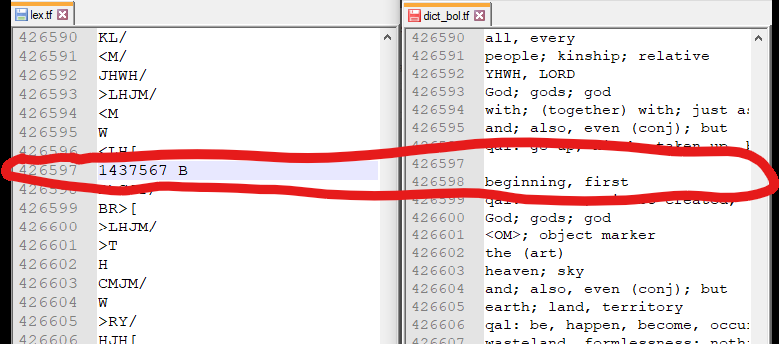

This line is empty in the produced file. Therefore, I will manually add this line after the export process has been executed:
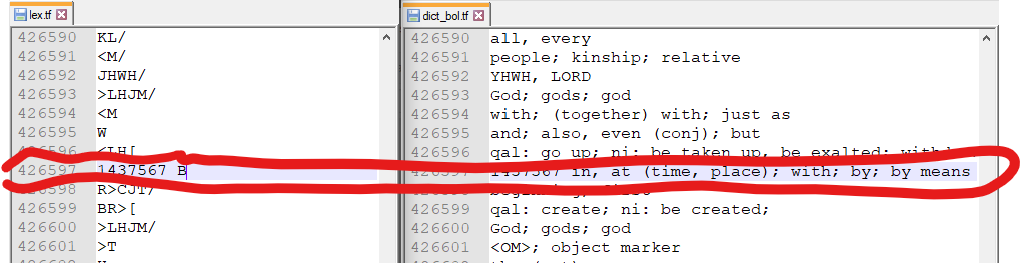

## Creating Homograph entries

In [ ]:
CombinedDF.head(5)

In [ ]:
CombinedDF['dict_lex'] = CombinedDF['dict_lex_HEB']
CombinedDF.head(5)

In [ ]:
CombinedDF.dict_lex.fillna(CombinedDF.dict_lex_ARM, inplace=True)
CombinedDF.head(5)

In [ ]:
CombinedDF[(CombinedDF['orig_order'] == 17277.0)].head()

In [ ]:
CombinedDF[(CombinedDF['orig_order'] == 17278.0)].head()

In [ ]:
bol_dict_HebArm = CombinedDF[['dict_lex']]
bol_dict_HebArm.head()

In [ ]:
bol_dict_HebArm.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/bol_dict_HebArm.xlsx', encoding='utf-16')

## Creating Verbal Classes

In [ ]:
CombinedDF.head(5)

In [ ]:
CombinedDF['verbalclass'] = CombinedDF['verbalclass_HEB']
CombinedDF.head(5)

In [ ]:
CombinedDF.verbalclass.fillna(CombinedDF.verbclass_ARM, inplace=True)
CombinedDF.head(5)

In [ ]:
bol_vc = CombinedDF[['verbalclass']]
bol_vc.head()

In [ ]:
bol_vc.to_excel('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/bol_vc.xlsx', encoding='utf-16')

## Creating English Dictionary list

In [ ]:
dict_bol_EN = VLookUp_left['dict_bol']
dict_bol_EN.head()

There is one issue with the produced file. Each TF file has a transition line from the end of the last monad of the text corpus to the summary list:
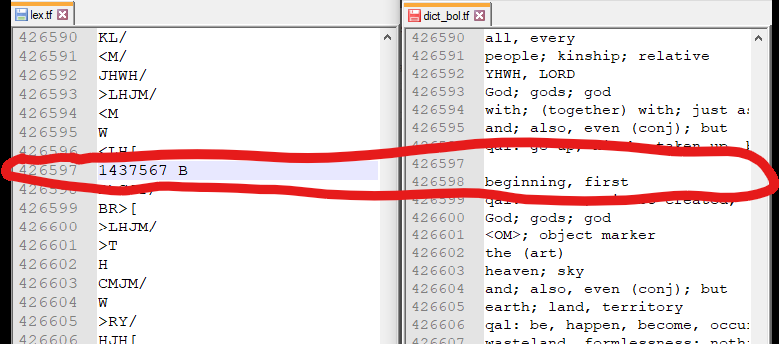

This line is empty in the produced file. Therefore, I will manually add this line after the export process has been executed:
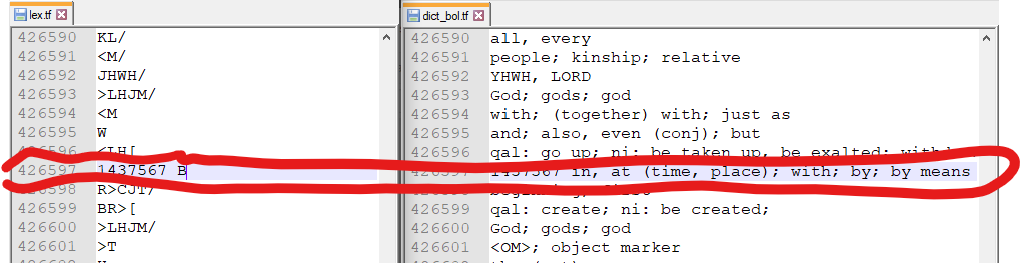

In [ ]:
dict_bol_abc = VLookUp_left['abc_order']
dict_bol_abc.head()

In [ ]:
dict_bol_abc.to_csv('d:/OneDrive/1200_AUS-research/Fabric-TEXT/feature-project_bhsa/dict_bol_abc.csv')

In [ ]:
# Now we load the TF bhsa database
BHS = use('bhsa', version=2021, hoist=globals())